In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

digits = MLPClassifier(
    hidden_layer_sizes=(64,),       
    activation='relu',               
    solver='adam',                   
    max_iter=5,              
)

In [79]:
digits.fit(X_train, y_train)

C:\Users\ETIA\.conda\envs\examen\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(64,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,5
,shuffle,True
,random_state,None


In [80]:
y_pred = digits.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5907
[[46  0  0  1  4  0  0  0  0  1]
 [ 0 30  0  2  0  0  4  1  1  5]
 [ 0 11 32  2  0  7  3  0  5  0]
 [ 1  6 35  6  1  4  2  0  1 10]
 [ 0  0  0  0 53  0  2  2  0  1]
 [ 2  1  3  4  0 37  1  3  0  4]
 [ 4  2  1  0  1  0 42  1  1  0]
 [ 5 10  0  0  1  2  0 31  0  0]
 [11 13  3  2  0  0  2  0 25 10]
 [ 5  3  2  6  0  0  0  2  4 17]]


In [81]:
digits = MLPClassifier(
    hidden_layer_sizes=(64,),       
    activation='relu',               
    solver='adam',                   
    max_iter= 100,              
)

digits.fit(X_train, y_train)

C:\Users\ETIA\.conda\envs\examen\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(64,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,None


In [82]:
y_pred = digits.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9704
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 60  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  1  1]
 [ 0  0  0  0 57  0  0  0  0  1]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  1  0  0  0  0 50  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  2  1  0  0  1  1  0 61  0]
 [ 0  0  0  0  0  1  0  1  3 34]]


In [88]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [89]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.3190 - val_accuracy: 0.9850 - val_loss: 0.0530
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9872 - val_loss: 0.0466
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9902 - val_loss: 0.0418
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0.0201 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9890 - val_loss: 0.0464


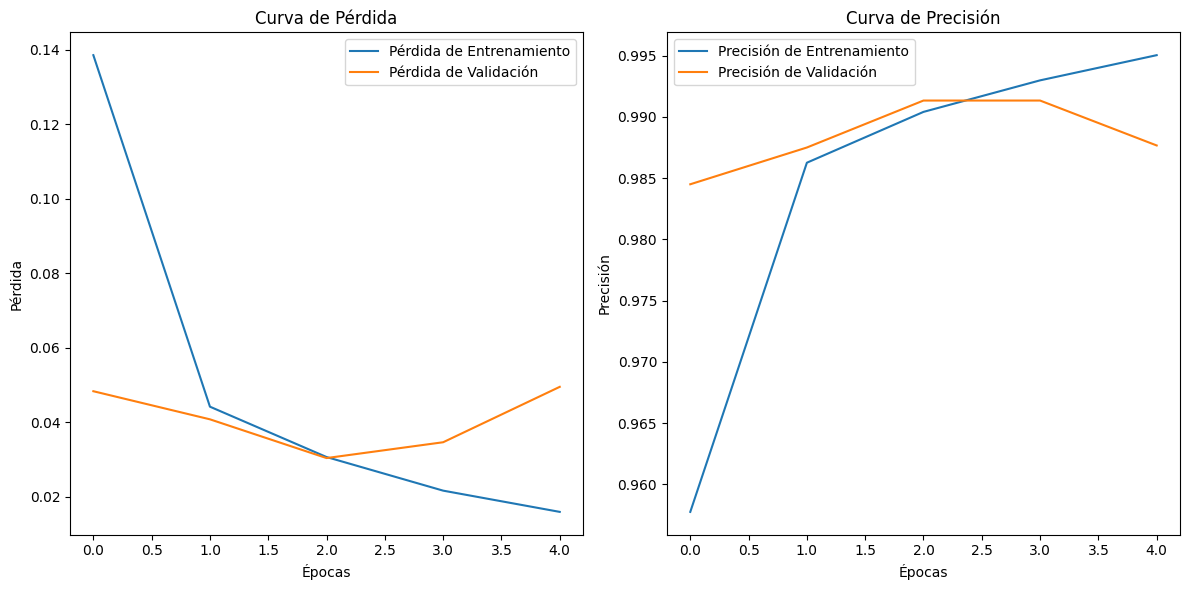

In [58]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Pérdida de Entrenamiento')
plt.plot(val_loss, label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Precisión de Entrenamiento')
plt.plot(val_accuracy, label='Precisión de Validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()